<a href="https://colab.research.google.com/github/divyaaids/python-induction-program/blob/main/navie_bayes(divya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
df = pd.read_csv("card_transdata.csv")

In [ ]:
df.head(20000)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
19995,3.588267,10.231303,0.966398,1.0,0.0,0.0,1.0,0.0
19996,23.172554,1.328389,3.505177,1.0,1.0,1.0,1.0,0.0
19997,35.762042,19.427188,0.812355,1.0,1.0,0.0,1.0,0.0
19998,38.799543,0.772350,0.235831,1.0,1.0,0.0,1.0,0.0


In [ ]:
df1=df.head(20000)

In [ ]:
df1.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
19995,3.588267,10.231303,0.966398,1.0,0.0,0.0,1.0,0.0
19996,23.172554,1.328389,3.505177,1.0,1.0,1.0,1.0,0.0
19997,35.762042,19.427188,0.812355,1.0,1.0,0.0,1.0,0.0
19998,38.799543,0.772350,0.235831,1.0,1.0,0.0,1.0,0.0
19999,1.384726,0.110899,0.776844,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,27.447447,5.013386,1.810614,0.882100,0.349500,0.103450,0.647250,0.085750
std,65.539998,24.327753,2.630532,0.322498,0.476824,0.304553,0.477838,0.280002
min,0.046497,0.000856,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.875902,0.306481,0.483910,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.186666,1.024255,1.010725,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26.276466,3.445633,2.094233,1.000000,1.000000,0.000000,1.000000,0.000000
max,2353.226927,1872.446884,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              20000 non-null  float64
 1   distance_from_last_transaction  20000 non-null  float64
 2   ratio_to_median_purchase_price  20000 non-null  float64
 3   repeat_retailer                 20000 non-null  float64
 4   used_chip                       20000 non-null  float64
 5   used_pin_number                 20000 non-null  float64
 6   online_order                    20000 non-null  float64
 7   fraud                           20000 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


In [ ]:
df1.nunique()

distance_from_home                20000
distance_from_last_transaction    20000
ratio_to_median_purchase_price    20000
repeat_retailer                       2
used_chip                             2
used_pin_number                       2
online_order                          2
fraud                                 2
dtype: int64

In [ ]:
df1.notnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
19995,True,True,True,True,True,True,True,True
19996,True,True,True,True,True,True,True,True
19997,True,True,True,True,True,True,True,True
19998,True,True,True,True,True,True,True,True


In [ ]:
df1.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

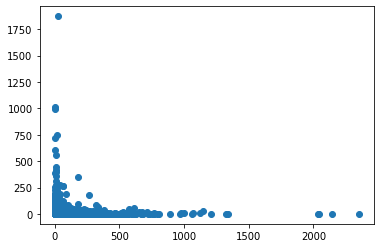

In [ ]:
plt.scatter(df1.distance_from_home,df1.distance_from_last_transaction)
plt.show()

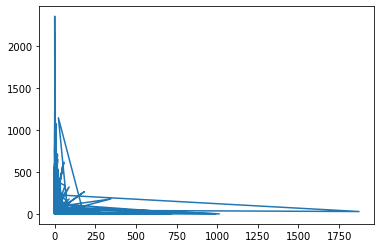

In [ ]:
plt.plot(df1.distance_from_last_transaction,df1.distance_from_home)

<ipython-input-15-57d9dd59e5cc>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(df1.used_chip,df1.distance_from_home)


<StemContainer object of 3 artists>

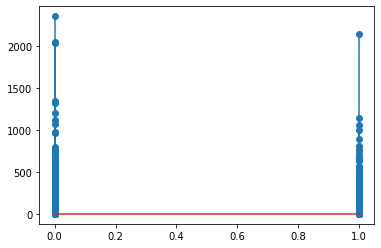

In [ ]:
plt.stem(df1.used_chip,df1.distance_from_home)

<BarContainer object of 20000 artists>

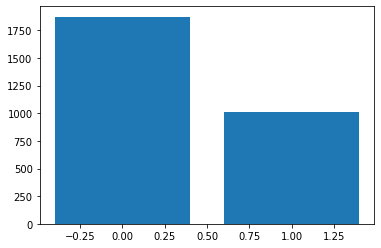

In [ ]:
plt.bar(df1.used_chip,df1.distance_from_last_transaction)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

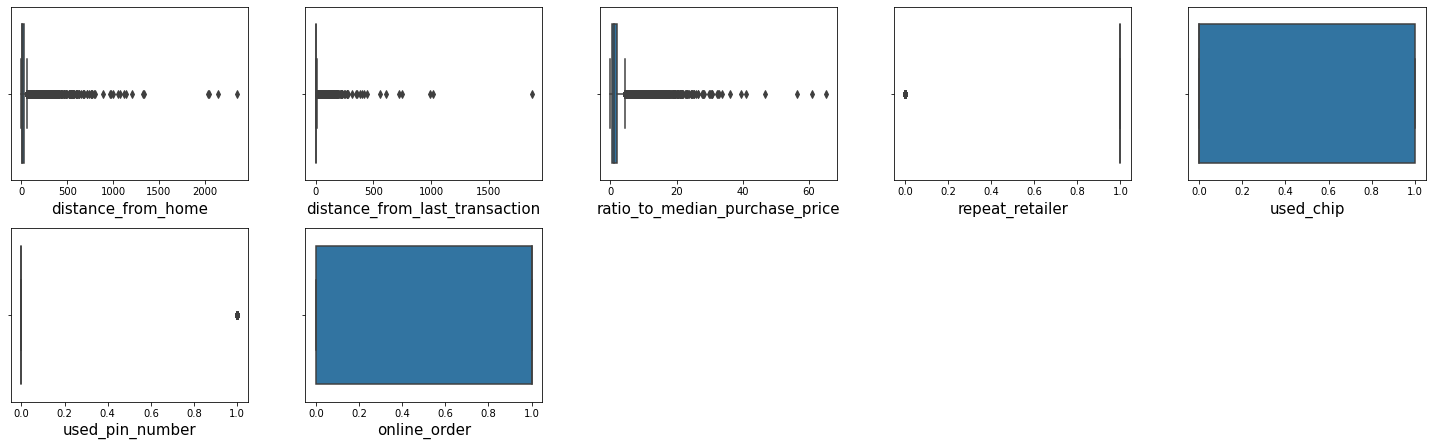

In [ ]:
plt.figure(figsize=(20,15)) 
plotnumber = 1
X=df1.drop('fraud',axis=1) 
Y=df1['fraud']

for col in X.columns:
    if plotnumber <=8:
      ax=plt.subplot(5,5, plotnumber) 
      sns.boxplot(X[col]) 
      plt.xlabel(col,fontsize=15)

    plotnumber +=1
plt.tight_layout()
plt.show()


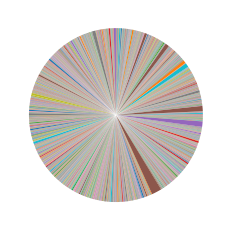

In [ ]:
plt.pie(df1.distance_from_last_transaction)
plt.show()

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics  import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df1.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        distance_from_home  distance_from_last_transaction  \
0                   False                           False   
1                   False                           False   
2                   False                           False   
3                   False                           False   
4                   False                           False   
...                   ...                             ...   
19995               False                           False   
19996               False                           False   
19997               False                           False   
19998               False                           False   
19999               False                           False   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                               False            False      False   
1                               False            False      False  

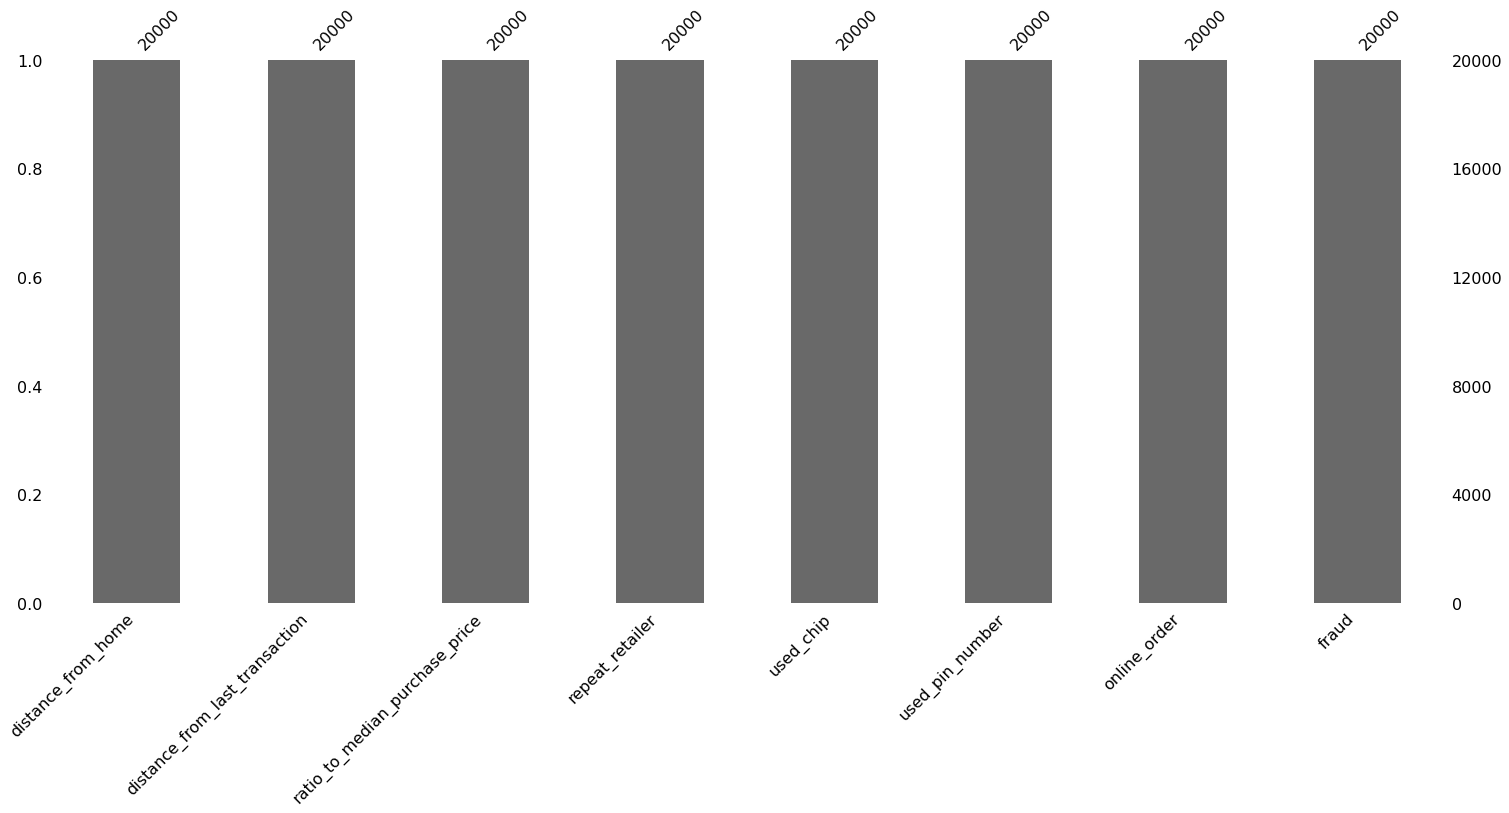

In [ ]:
import missingno as msno

msno.bar(df1)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.25 ,random_state=0) 

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train) 
X_test = a.transform(X_test)

In [ ]:

 clf = DecisionTreeClassifier(criterion="entropy",random_state=0) 
 clf.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test,Y_pred) 
cm

array([[4578,    3],
       [   1,  418]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9992

In [ ]:
 #naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
clf1= GaussianNB()
clf1.fit(X_train,Y_train)
 

GaussianNB()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.5 ,random_state=5) 

In [ ]:
a = StandardScaler()
X_train = a.fit_transform(X_train) 
X_test = a.transform(X_test)

In [ ]:
Y_pred = clf.predict(X_train)

In [ ]:
cm = confusion_matrix(Y_train,Y_pred)
cm

array([[9092,   82],
       [   1,  825]])

In [ ]:
accuracy_score(Y_train,Y_pred)

0.9917